<a href="https://colab.research.google.com/github/Ndy-S/machine-learning-fundamental/blob/main/Natural%20Language%20Processing%20with%20Sequence%20Models/W3_lstm_named_entity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTMs and Named Entity Recognition

## RNNs and Vanishing Gradients
### Outline
- Backprop through time
- RNNs and vanishing/exploding gradients
- Solution

### RNNs: Advantages
- Captures dependencies within a short range
- Takes up less RAM than other n-gram models

### RNNs: Disadvantages
- Struggles to capture long term dependencies
- Prone to vanishing or exploding gradients


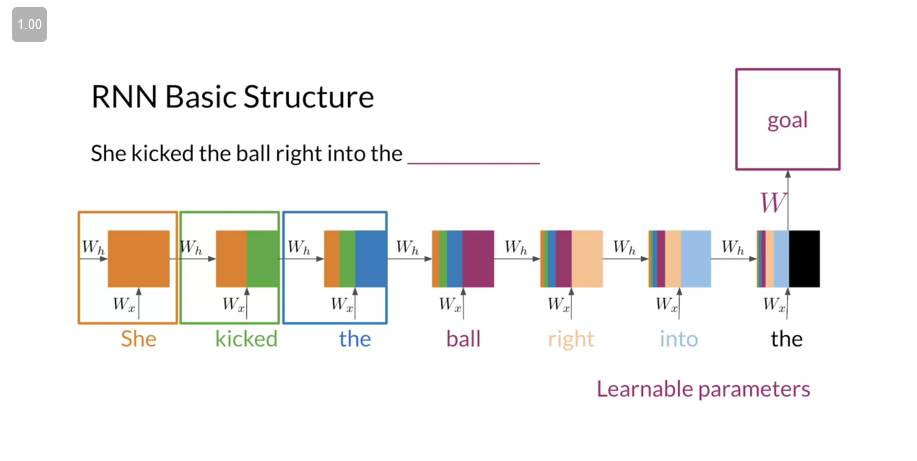

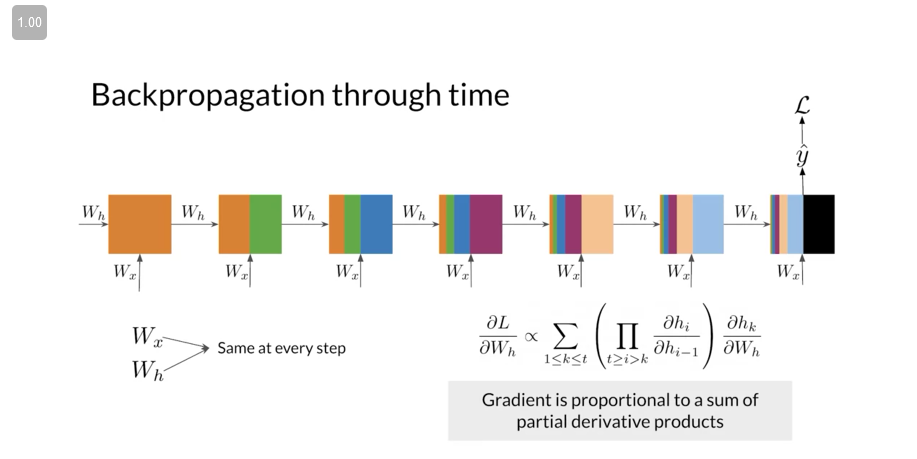

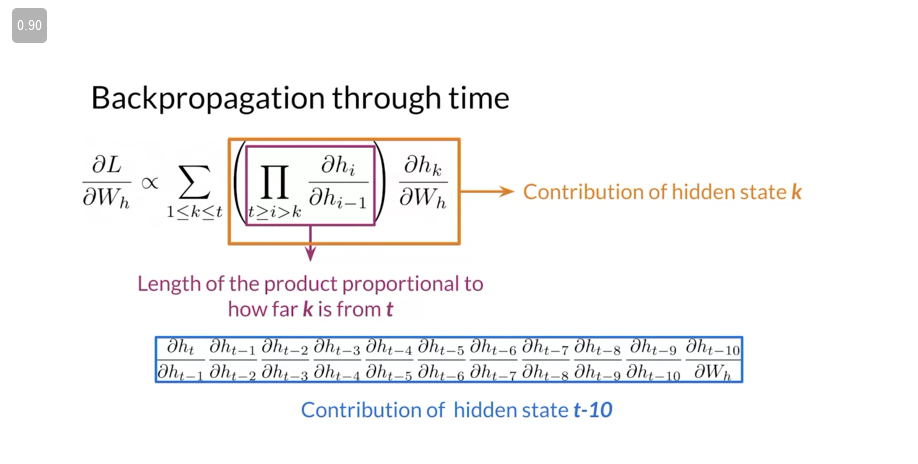

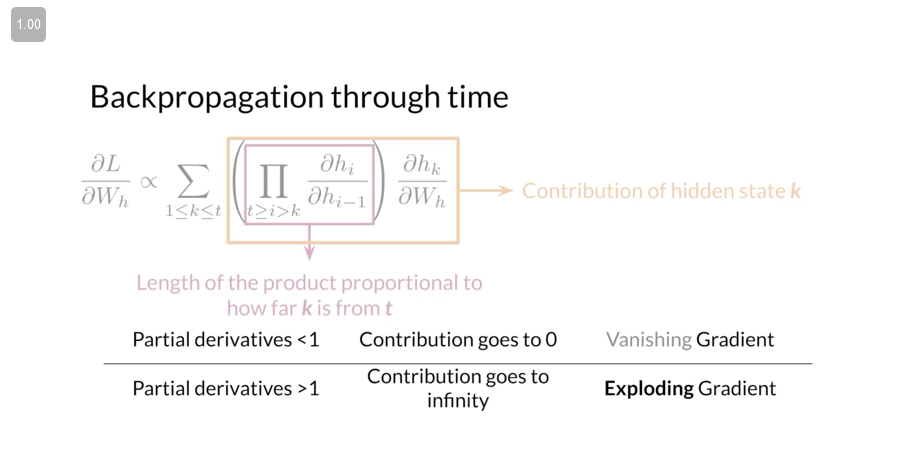

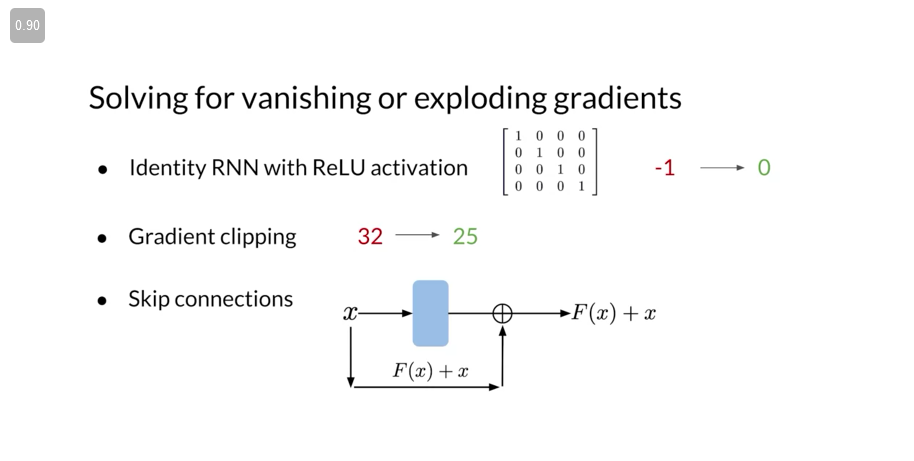

In [1]:
# SECTION DIVIDER

## Vanishing Gradients Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [8]:
# Activation
x = np.linspace(-6, 6, 100)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

activations = sigmoid(x)

def sigmoid_gradient(x):
  return sigmoid(x) * (1 - sigmoid(x))

def plot_func(x_tan = 0):
  plt.plot(x, activations)
  plt.title("Sigmoid Function and Gradient")
  plt.xlabel("$x$")
  plt.ylabel("sigmoid($x$)")
  plt.text(x_tan, sigmoid(x_tan), f"Gradient: {sigmoid_gradient(x_tan):.4f}")
  plt.xlim((-6,6))
  plt.ylim((-0.5,1.5))
  plt.rcParams['figure.figsize'] = [7, 5]
  y_tan = sigmoid(x_tan)
  span = 4
  data_tan = np.linspace(x_tan - span, x_tan + span)
  gradient_tan = sigmoid_gradient(x_tan)
  tan = y_tan + gradient_tan * (data_tan - x_tan)
  plt.plot(x_tan, y_tan, marker="o", color="orange", label=True)
  plt.plot(data_tan, tan, linestyle="--", color="orange")
  plt.show()

interact(plot_func, x_tan = widgets.FloatSlider(value=0, min=-6, max=6, step=0.5))

interactive(children=(FloatSlider(value=0.0, description='x_tan', max=6.0, min=-6.0, step=0.5), Output()), _do…

<function __main__.plot_func(x_tan=0)>

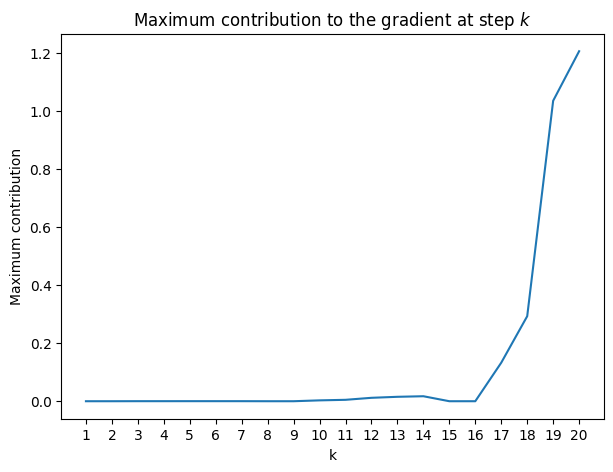

In [13]:
# Vanishing gradient with sigmoid activation
np.random.seed(12345)
t = 20
h = np.random.randn(5, t)
x = np.random.randn(5, t)

b_h = np.random.randn(5, 1)
W_hx = np.random.randn(5, 5)

eig = np.random.rand(5) * 4
Q = np.random.randn(5, 5)
W_hh = Q @ np.diag(eig) @ np.linalg.inv(Q)

def prod(k):
    p = 1
    for i in range(t-1, k-2, -1):
        p *= W_hh.T @ np.diag(sigmoid_gradient(W_hh @ h[:,i] + W_hx @ x[:,i] + b_h))
    return p

product = np.zeros(20)
for k in range(t):
    product[k] = np.max(prod(k+1))

plt.plot(np.array(range(t))+1, product)
plt.title("Maximum contribution to the gradient at step $k$");
plt.xlabel("k");
plt.ylabel("Maximum contribution");
plt.xticks(np.array(range(t))+1);

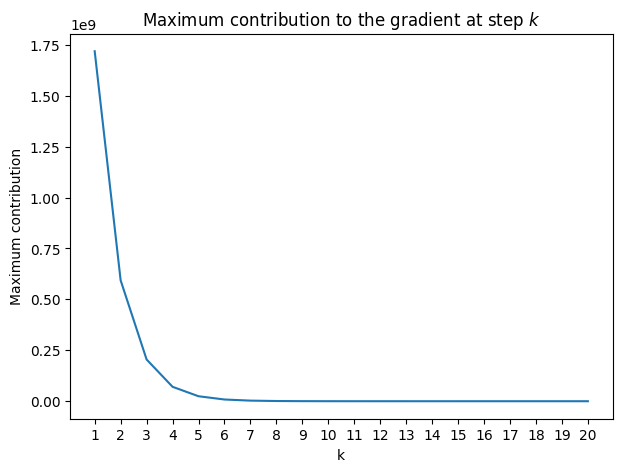

In [16]:
# Exploding gradient with sigmoid activation
np.random.seed(12345)
t = 20
h = np.zeros((5, t))
x = np.zeros((5, t))

b_h = np.zeros((5, 1))
W_hx = np.random.randn(5, 5)

eig = 4 + np.random.rand(5) * 10
Q = np.random.randn(5, 5)
W_hh = Q @ np.diag(eig) @ np.linalg.inv(Q)

product = np.zeros(20)
for k in range(t):
    product[k] = np.max(prod(k+1))

plt.plot(np.array(range(t))+1, product)
plt.title("Maximum contribution to the gradient at step $k$");
plt.xlabel("k");
plt.ylabel("Maximum contribution");
plt.xticks(np.array(range(t))+1);

In [17]:
# SECTION DIVIDER

## Introduction to LSTMs
### Outline
- Meet the Long short-term memory unit!
- LSTM architecture
- Applications

### LSTMs: a memorable solution
- Learns when to remember and when to forget
- Basic anatomy:
  - A cell state
  - A hidden state
  - Multiple gates
- Gates allow gradients to avoid vanishing and exploding

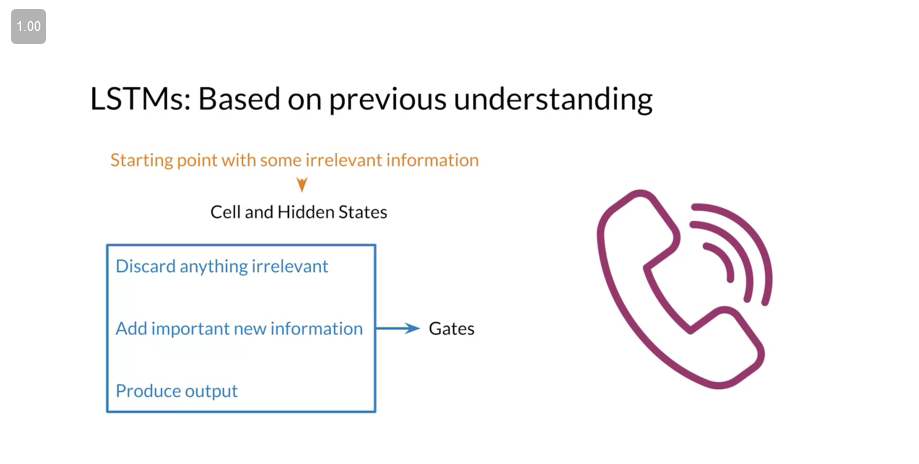

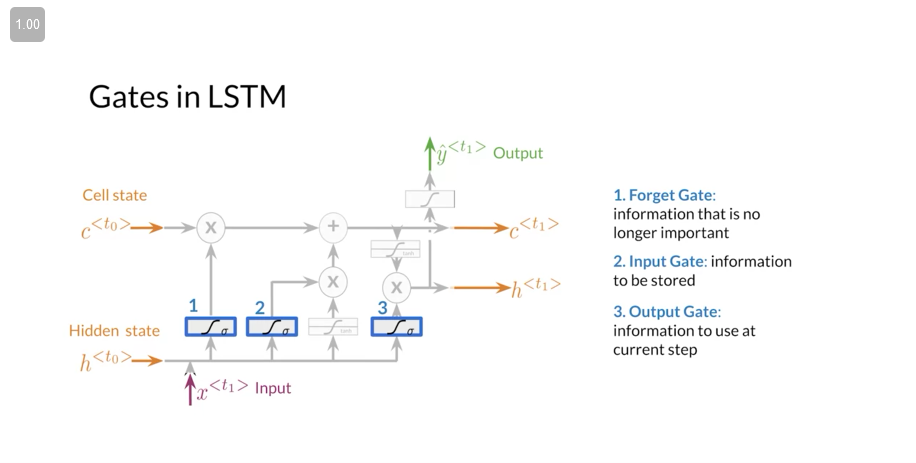

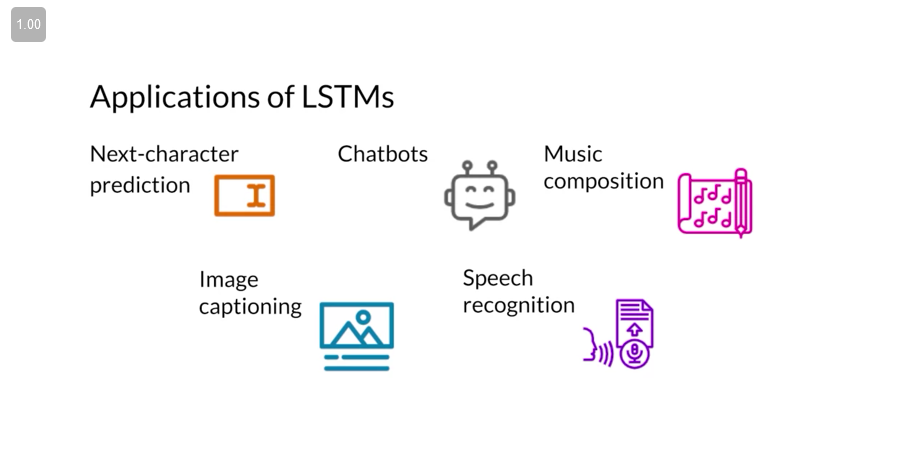

### Summary
- LSTMs offer a solution to vanishing gradients
- Typical LSTMs have a cell and three gates:
  - Forget gate
  - Input gate
  - Output gate

In [18]:
# SECTION DIVIDER

## LSTM Architecture

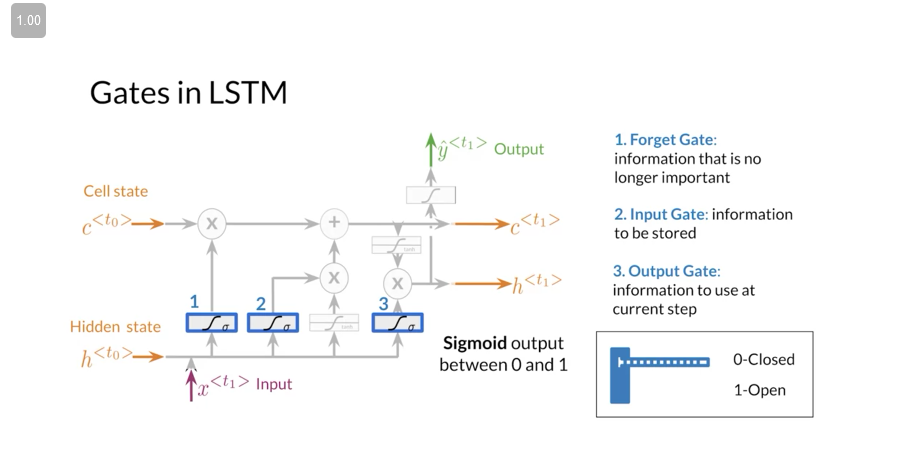

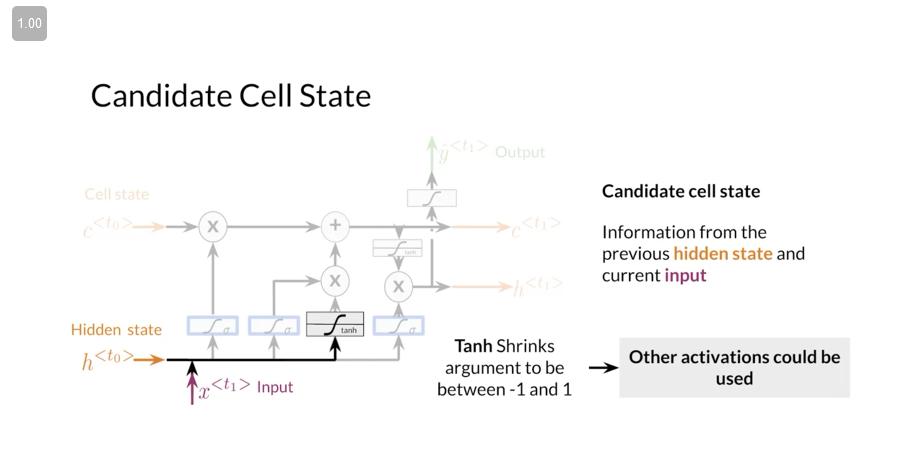

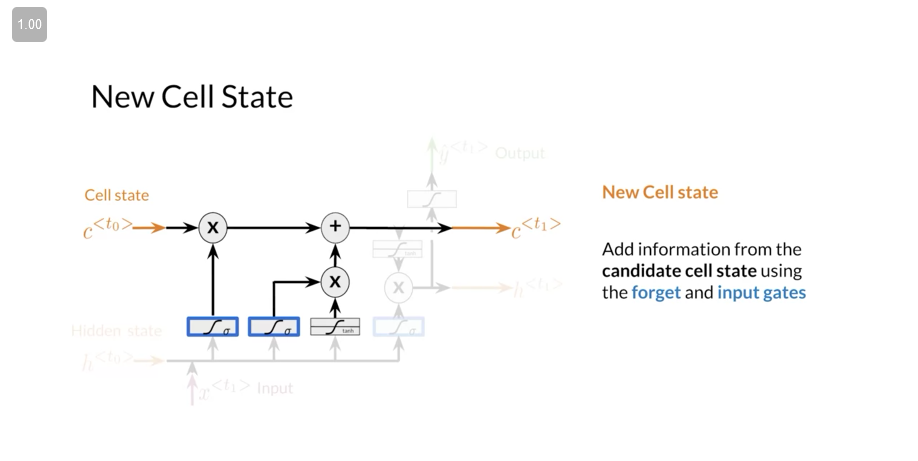

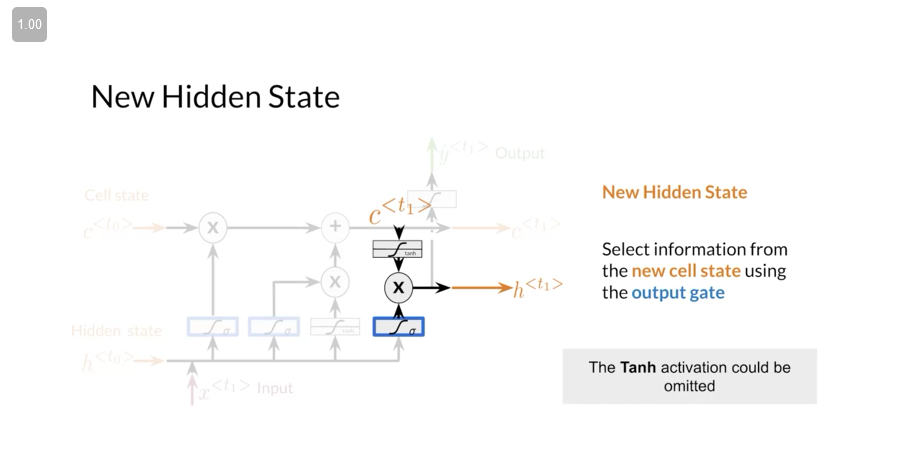

### Summary
- LSTMs use a series of gates to decide which information to keep:
  - Forget gate decides what to keep
  - Input gate decides what to add
  - Output gate decides what the next hidden state will be

In [19]:
# SECTION DIVIDER

## Introduction to Named Entity Recognition
### What is Named Entity Recognition?
- Locates and extracts predefined entities from text
- Places, organizations, names, time and dates

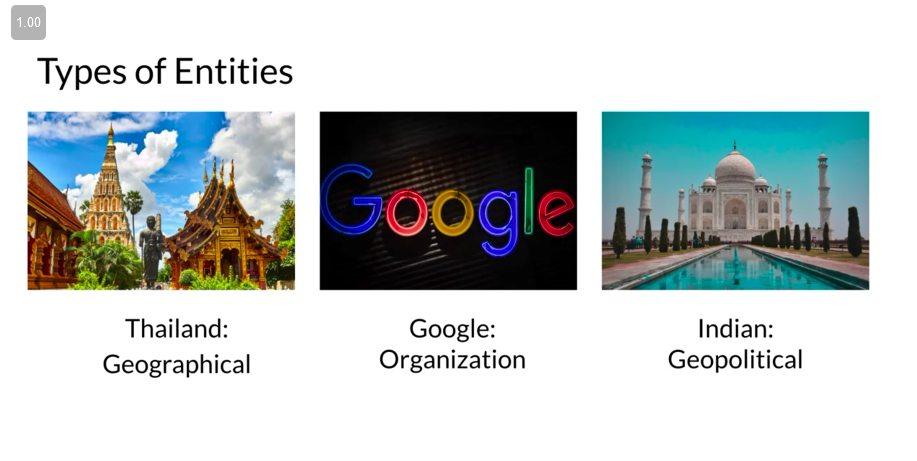

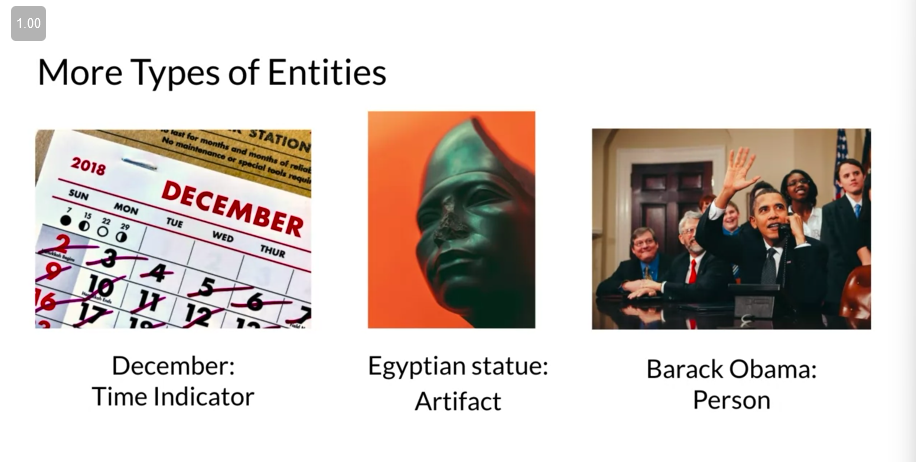

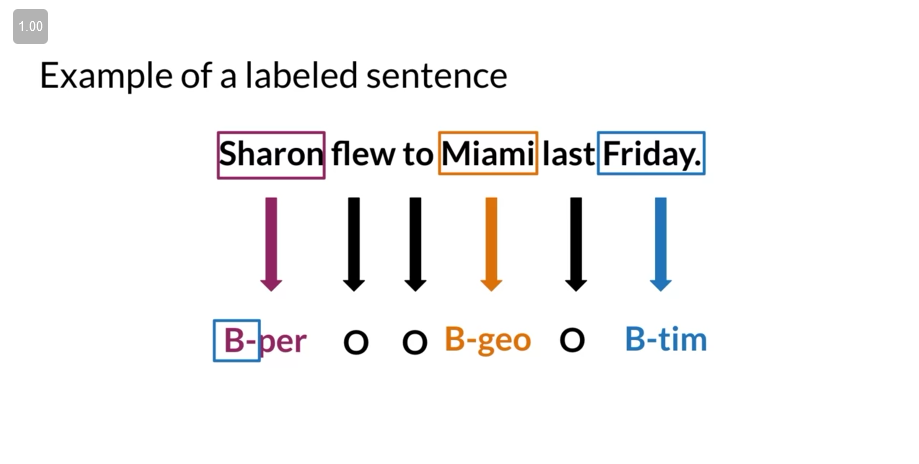

### Applications of NER systems
- Search engine efficiency
- Recommendation engines
- Customer service
- Automatic trading

In [20]:
# SECTION DIVIDER

## LSTM Equations
- The forget gate: $f = σ(W_f[h_{t−1};x_t] + b_f)$
- The input gate: $i = σ(W_i[h_{t−1};x_t] + b_i)$
- The gate gate: $g = tanh(W_g[h_{t−1};x_t] + b_g)$
- The cell state: $c_t = f ⊙ c_{t-1} + i ⊙ g$
- The output gate: $o = σ(W_o[h_{t−1};x_t] + b_o)$
- The output of LSTM unit: $h_t = o_t ⊙ tanh(c_t)$

In [21]:
# SECTION DIVIDER

## Training NERs: Data Processing
### Outline
- Convert words and entity classes into arrays
- Token padding
- Create a data generator

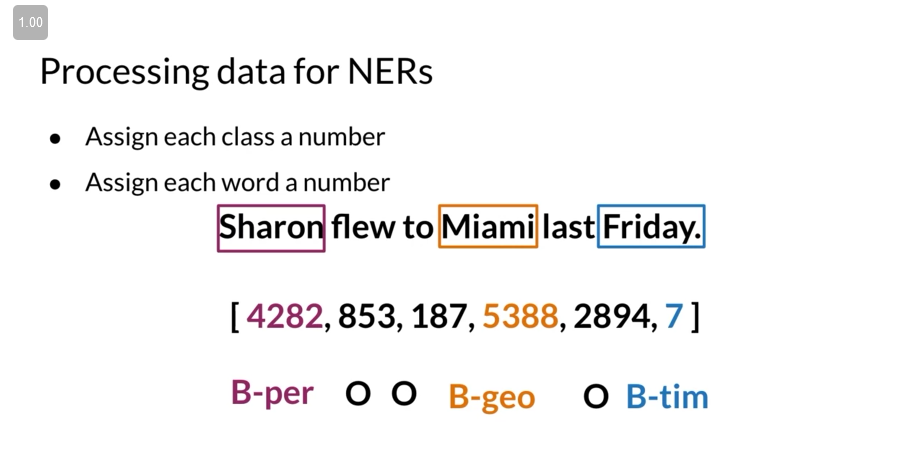

### Token padding
For LSTMs, all sequences need to be the same size.
- Set sequence length to a certain number
- Use the **\<PAD\>** token to fill empty spaces

### Training the NER
1. Create a tensor for each input and its corresponding number
2. Put them in a batch --> 64, 128, 256, 512 ...
3. Feed it into an LSTM unit
4. Run the output through a dense layer
5. Predict using a log softmax over K classes

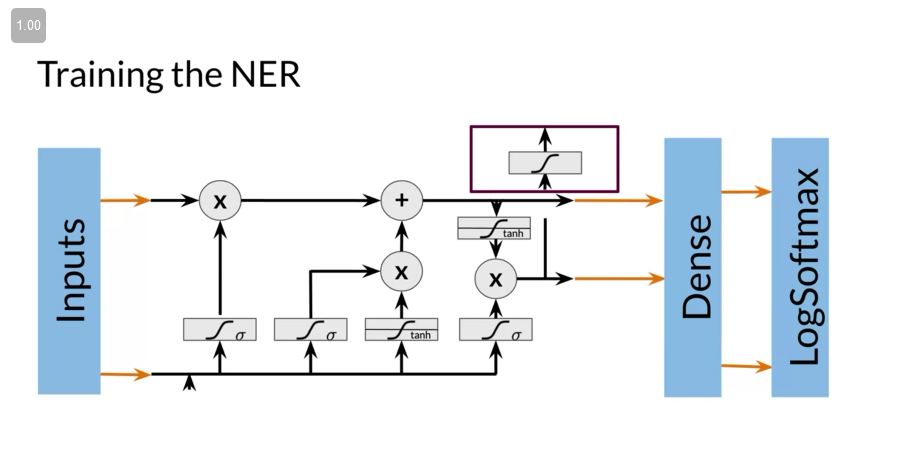

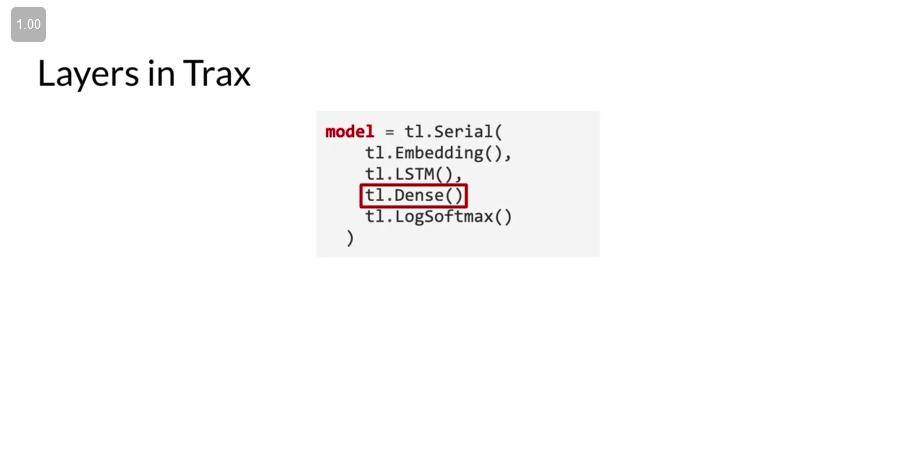

### Summary
- Convert words and entities into same-length numerical arrays
- Train in batches for faster processing
- Run the output through a final layer and activation

In [23]:
# SECTION DIVIDER

## Computing Accuracy
### Evaluating the model
1. Pass the test set through the model
2. Get arg max across the prediction array
3. Mask padded tokens
4. Compare outputs against test labels

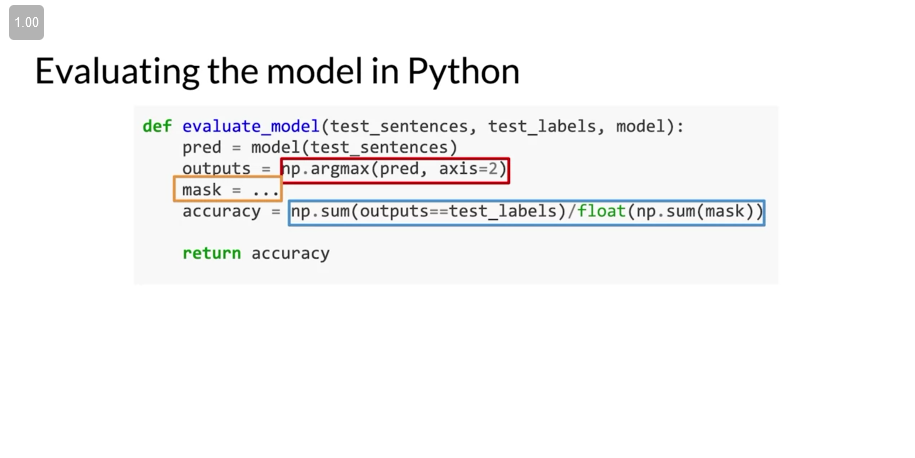

### Summary
- If padding tokens, remember to mask them when computing accuracy
- Coding assignment!

In [24]:
# SECTION DIVIDER

## Named Entity Recognition (NER)